In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
#Read Files:
train = pd.read_csv(r'C:\Users\Alka Anil\Desktop\ML PROJECT\train.csv')
test = pd.read_csv(r'C:\Users\Alka Anil\Desktop\ML PROJECT\test.csv')

In [2]:
pwd #default path

'C:\\Users\\Alka Anil\\ML'

In [3]:
#DATA EXPLORATION

In [4]:
train.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [6]:
#to check for duplicates
idsUnique = len(set(test.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6980 duplicate IDs for 8523 total entries


In [7]:
len(test.columns) #column length

11

In [8]:
len(train.columns)

12

In [9]:
len(test) #row length



5681

In [10]:
len(train)

8523

In [11]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [15]:
#Create source column to later separate the data easily
train['source']='train'
test['source']='test'

In [16]:
#combine data to perform certain tasks together and devide it later 
data=pd.concat([train,test],ignore_index=True,sort=False)


In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [18]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
#to check for duplicates
idsUnique = len(set(data.Item_Identifier))
idsTotal = data.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 12645 duplicate IDs for 14204 total entries


In [20]:
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [21]:
#to check null values
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [22]:
#no: of unique values in each
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

Text(0.5,1,'Item_Outlet_Sales Distribution')

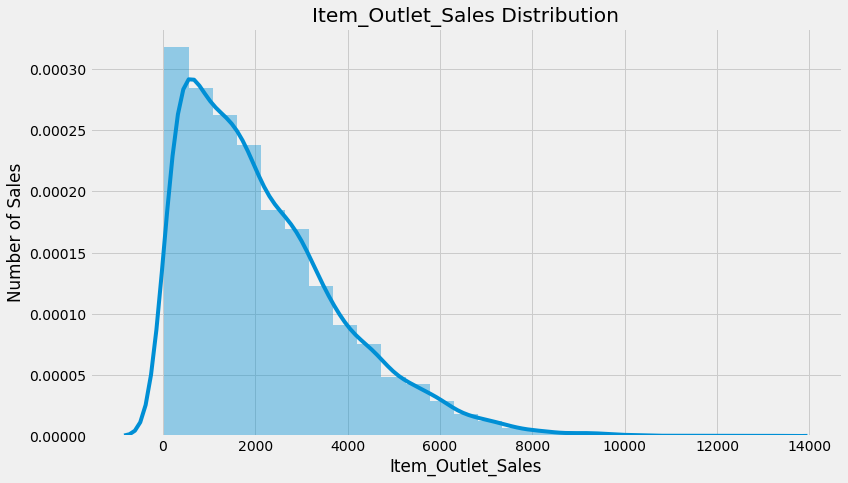

In [23]:
#distribution of the target variable Item_Outlet_Sales
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [24]:
print("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


In [25]:
#to find correlation between numeric predictors and target variable
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes


Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [26]:
corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [27]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


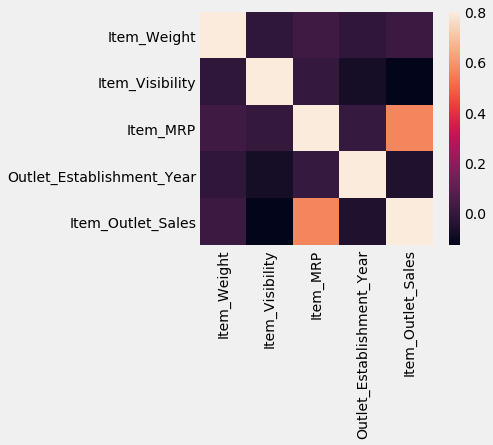

In [28]:
#correlation matrix
f, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, vmax=.8, square=True);

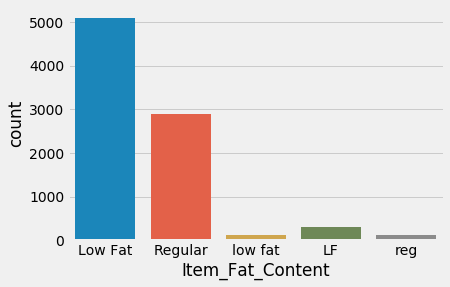

In [29]:
#to find distribution with categorical predictors Item_Fat_Content
sns.countplot(train.Item_Fat_Content)

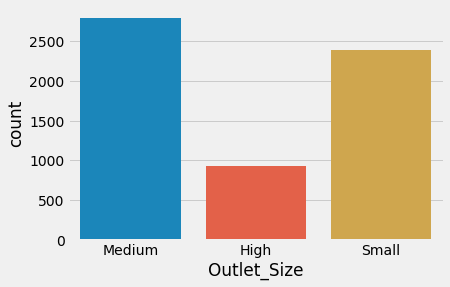

In [30]:
#distribution of the variable Outlet_Size
sns.countplot(train.Outlet_Size)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

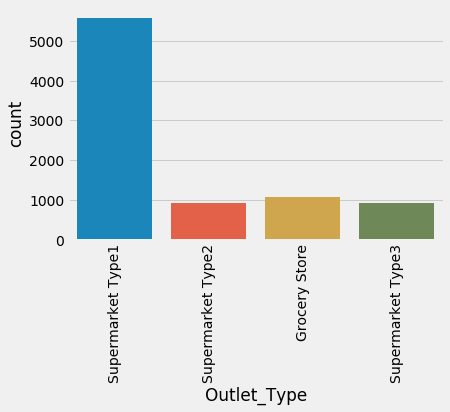

In [31]:
# distribution of the variable Outlet_Type
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

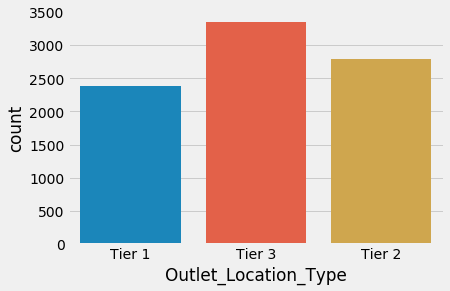

In [32]:
#distribution of the variable Outlet_Location_Type
sns.countplot(train.Outlet_Location_Type)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

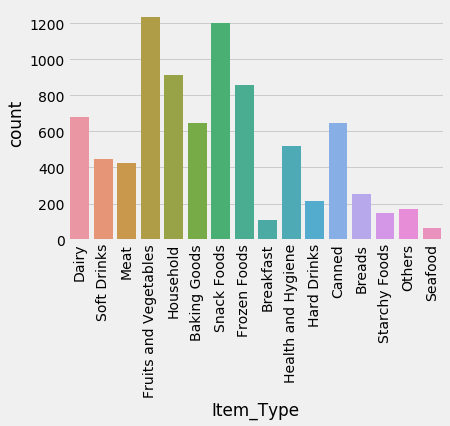

In [33]:
#distribution of the variable Item_Type
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

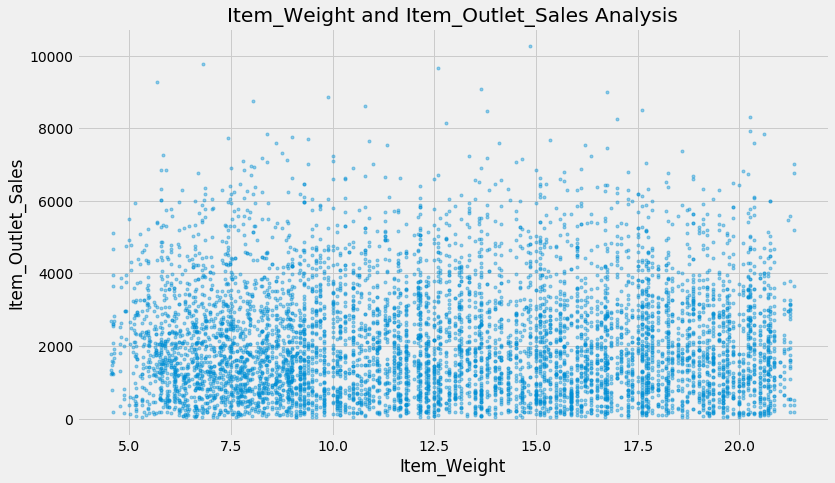

In [34]:
#analysis between Item_weight and Item_Outlet_Sales
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.4)

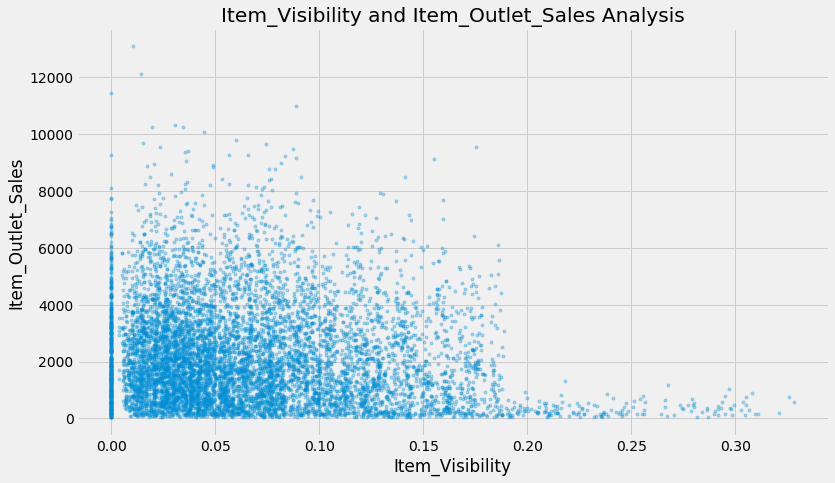

In [35]:
#analysis between item_visibility and Item_Outlet_sales
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

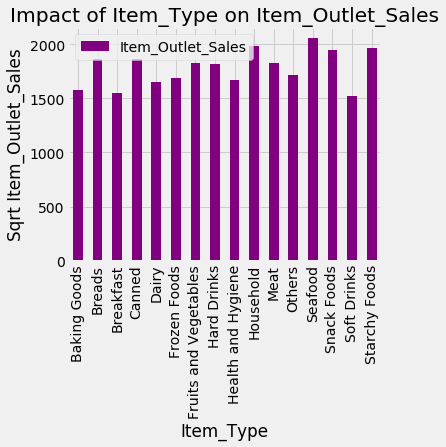

In [36]:
Item_Type = \
train.pivot_table(index=['Item_Type'], values="Item_Outlet_Sales", aggfunc=np.median)
Item_Type.plot(kind='bar', color='purple',figsize=(5,4))
plt.xlabel("Item_Type")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

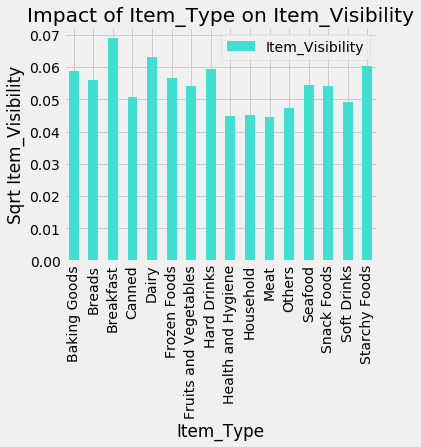

In [37]:
Item_Type = \
train.pivot_table(index=['Item_Type'], values="Item_Visibility", aggfunc=np.median)
Item_Type.plot(kind='bar', color='turquoise',figsize=(5,4))
plt.xlabel("Item_Type")
plt.ylabel("Sqrt Item_Visibility")
plt.title("Impact of Item_Type on Item_Visibility")
plt.xticks(rotation=90)
plt.show()

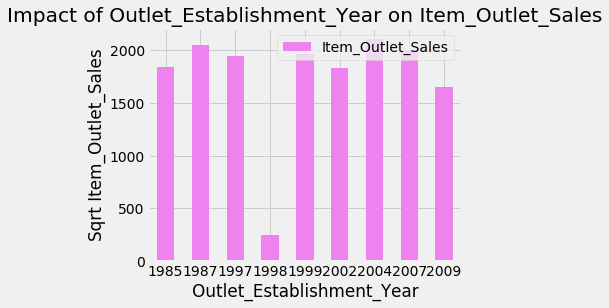

In [38]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='violet',figsize=(5,4))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

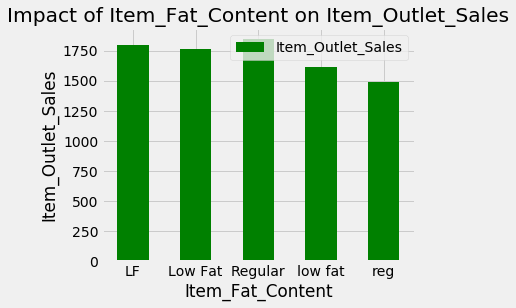

In [39]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='green',figsize=(5,4))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [40]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [41]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


In [42]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


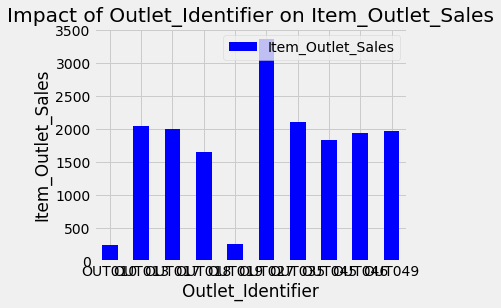

In [43]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(5,4))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

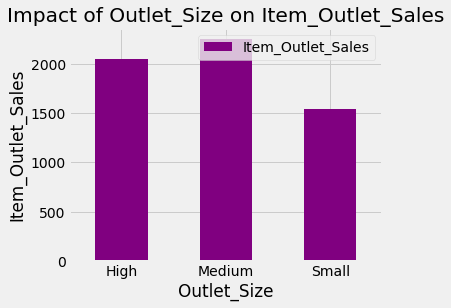

In [44]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='purple',figsize=(5,4))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

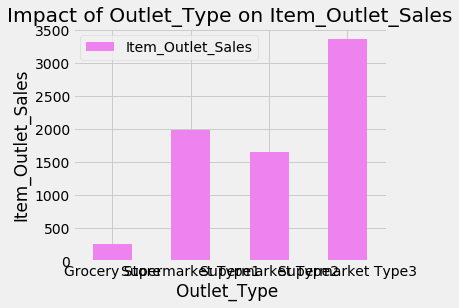

In [45]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='violet',figsize=(5,4))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

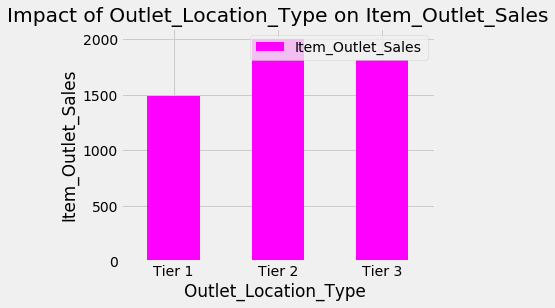

In [46]:
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='magenta',figsize=(5,4))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [47]:
#Data pre-processing

In [48]:
#let do grouping in each catogorical columns

col=["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size"]

for i in col:
    print("The frequency distribution of each catogorical columns is--" + i+"\n")
    print(data[i].value_counts()) 

The frequency distribution of each catogorical columns is--Item_Fat_Content

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
The frequency distribution of each catogorical columns is--Item_Type

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
The frequency distribution of each catogorical columns is--Outlet_Location_Type

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
The frequency distribution of each catogorical columns is--

In [49]:
#Replacing the minimum nan values in the Item_Weight with its mean value

#data.fillna({"Item_Weight":data["Item_Weight"].mean()},inplace=True)
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
#print(item_avg_weight)

In [50]:
#checking the current status of  nan values in the dataframe
#nan_descript=data.apply(lambda x: sum(x.isnull()))
#Now we have 0 nan valuesin Item_Weight
data[:][data['Item_Identifier'] == 'DRI11']
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [51]:
#data["Outlet_Size"].fillna(method="ffill",inplace=True)
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [52]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


In [53]:
#Creates pivot table with Outlet_Type and the mean of Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [54]:
nan_descript=data.apply(lambda x: sum(x.isnull()))

In [55]:
nan_descript

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [56]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [57]:
#Now working on the item_visibility
visibilty_avg=data.pivot_table(values="Item_Visibility",index="Item_Identifier")


In [58]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [59]:
itm_visi=data.groupby('Item_Type')

In [60]:
data_frames=[]
for item,item_df in itm_visi:
   data_frames.append(itm_visi.get_group(item))
for i in data_frames:
    i["Item_Visibility"].fillna(value=i["Item_Visibility"].mean(),inplace=True)
    i["Item_Outlet_Sales"].fillna(value=i["Item_Outlet_Sales"].mean(),inplace=True)




In [61]:
new_data=pd.concat(data_frames)

nan_descript=new_data.apply(lambda x: sum(x.isnull()))

In [62]:
#Now we have successfully cleaned our complete dataset.
new_data["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)


In [63]:
new_data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [64]:
#Get the first two characters of ID:
#data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
#data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
#data['Item_Type_Combined'].value_counts()
#Mark non-consumables as separate category in low_fat:
#new_data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
#new_data['Item_Fat_Content'].value_counts()

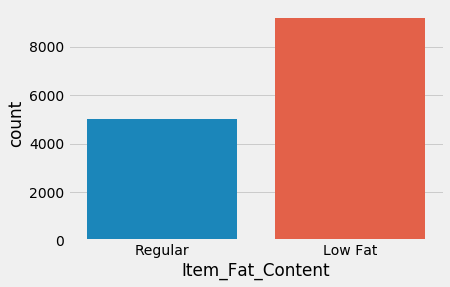

In [65]:
#to find distribution with categorical predictors Item_Fat_Content
sns.countplot(new_data.Item_Fat_Content)

In [66]:
#feature engineering

In [67]:
#Implementing one-hot-Coding method for getting the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [68]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type'])


In [69]:
#Exporting the datas

train = data.loc[data['source']=="train"]

test = data.loc[data['source']=="test"]



In [70]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [71]:
#Drop unnecessary columns
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [72]:
#dropping Item_Outlet_Sales for building the prediction model
train.drop(['source'],axis=1,inplace=True)


In [73]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)


In [74]:
#testing different models

In [75]:
train=pd.read_csv('train_modified.csv')
test=pd.read_csv('test_modified.csv')

In [76]:
#let us keep a baseline model for non-predicting model
#MEAN BASED
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("alg0.csv",index=False)

#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

import numpy as np
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g"  % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
     #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


In [77]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
Y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

#X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

Creating the models and processing

Model Report
RMSE : 1127
CV Score : Mean - 1134 | Std - 44.02 | Min - 1077 | Max - 1212


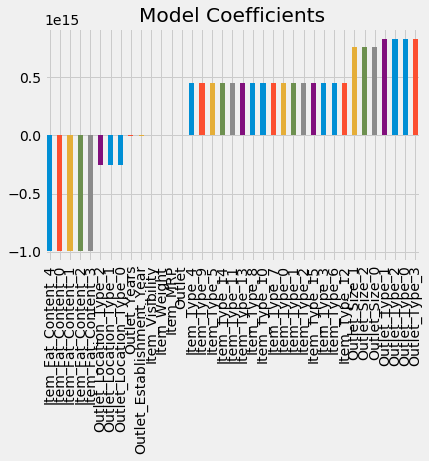

In [78]:
#Linear Regression Model
print("Creating the models and processing")
from sklearn.linear_model import LinearRegression, Ridge
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients') 

    

In [79]:
alg1_accuracy = round(alg1.score(X_train,Y_train) * 100,2)
alg1_accuracy

56.38


Model Report
RMSE : 1130
CV Score : Mean - 1134 | Std - 42.77 | Min - 1081 | Max - 1218
Model has been successfully created and trained. The predicted result is in alg2.csv


56.14

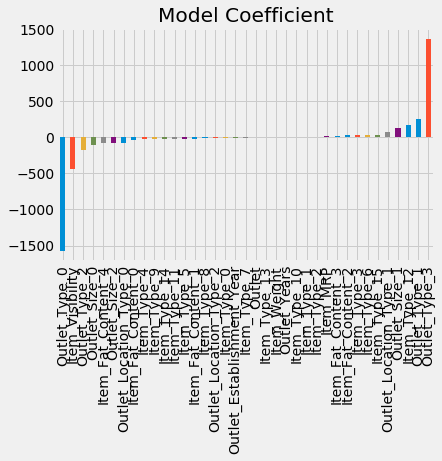

In [80]:
#Ridge Regression Model
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficient') #model coefficient
print("Model has been successfully created and trained. The predicted result is in alg2.csv")

alg2_accuracy = round(alg2.score(X_train,Y_train) * 100,2)
alg2_accuracy



Model Report
RMSE : 1071
CV Score : Mean - 1084 | Std - 44.22 | Min - 1009 | Max - 1172
Model has been successfully created and trained. The predicted result is in alg3.csv


60.64

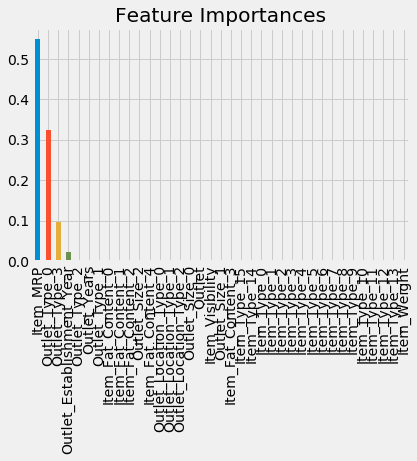

In [81]:
# Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=6, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances') #feature importances

print("Model has been successfully created and trained. The predicted result is in alg3.csv")
alg3_accuracy = round(alg3.score(X_train,Y_train) * 100,2)
alg3_accuracy


Model Report
RMSE : 1074
CV Score : Mean - 1088 | Std - 45.84 | Min - 1008 | Max - 1174
Model has been successfully created and trained. The predicted result is in alg3.csv


60.35

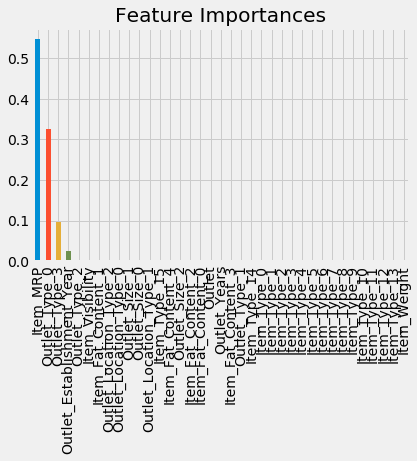

In [82]:
#change parametre
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg4 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=70)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

print("Model has been successfully created and trained. The predicted result is in alg3.csv")
alg4_accuracy = round(alg4.score(X_train,Y_train) * 100,2)
alg4_accuracy


Model Report
RMSE : 1064
CV Score : Mean - 1082 | Std - 43.33 | Min - 1021 | Max - 1159
Model has been successfully created and trained. The predicted result is in alg5.csv


61.14

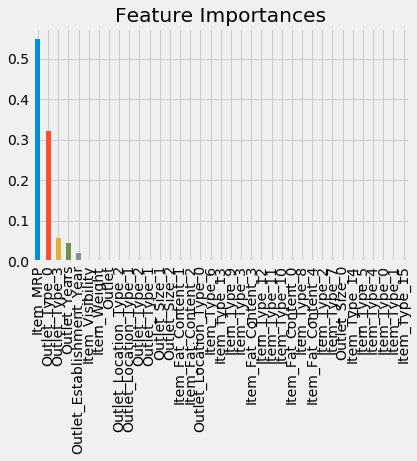

In [83]:
#Random Forest Model

from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=350,max_depth=7, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')#FI

print("Model has been successfully created and trained. The predicted result is in alg5.csv")

alg5_accuracy = round(alg5.score(X_train,Y_train) * 100,2)
alg5_accuracy


Model Report
RMSE : 1068
CV Score : Mean - 1082 | Std - 43.85 | Min - 1018 | Max - 1159


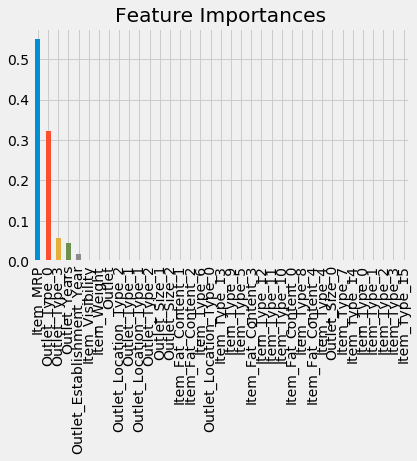

60.81

In [84]:
# change parametre
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')
plt.show()

alg6_accuracy = round(alg6.score(X_train,Y_train) * 100,2)
alg6_accuracy


Model Report
RMSE : 1152
CV Score : Mean - 1160 | Std - 40.5 | Min - 1087 | Max - 1251


54.4

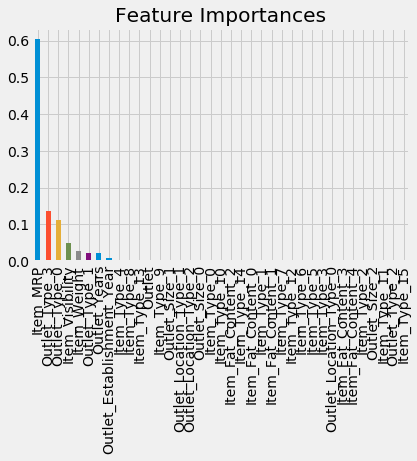

In [85]:
#AdaBoost Model
from sklearn.ensemble import AdaBoostRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg7= AdaBoostRegressor(n_estimators=2000, learning_rate=0.05)
modelfit(alg7, train, test, predictors, target, IDcol, 'alg7.csv')
coef7= pd.Series(alg7.feature_importances_, predictors).sort_values(ascending=False)
coef7.plot(kind='bar', title='Feature Importances')#ft

alg7_accuracy = round(alg7.score(X_train,Y_train) * 100,2)
alg7_accuracy


Model Report
RMSE : 1114
CV Score : Mean - 1122 | Std - 49.75 | Min - 1056 | Max - 1228


57.4

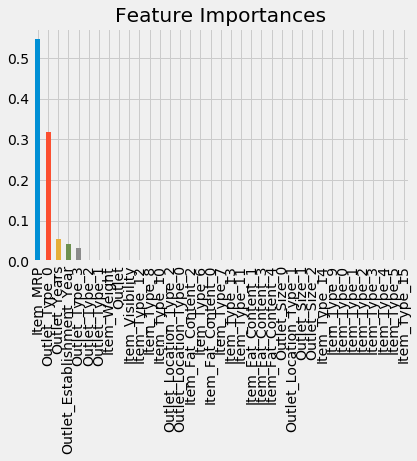

In [86]:
#Gradient Boost Model
from sklearn.ensemble import GradientBoostingRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg8 = GradientBoostingRegressor(n_estimators= 50, learning_rate= 0.03, max_depth= 4)
modelfit(alg8, train, test, predictors, target, IDcol, 'alg8.csv')
coef8 = pd.Series(alg8.feature_importances_, predictors).sort_values(ascending=False)
coef8.plot(kind='bar', title='Feature Importances')#FT

alg8_accuracy = round(alg8.score(X_train,Y_train) * 100,2)
alg8_accuracy

Mean Absolute Error : 16.409801
RMSE : 1069


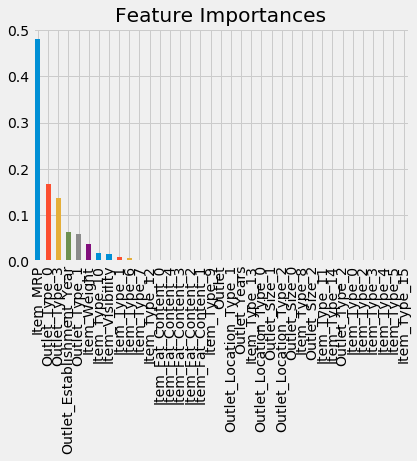

Model has been successfully created and trained. The predicted result is in alg9.csv


60.75

In [93]:
#XGBoost Model

from xgboost import XGBRegressor
import xgboost as xgb
alg9 = XGBRegressor(n_estimators=1000, learning_rate=0.04)
alg9.fit(train[predictors], train[target],early_stopping_rounds=5,eval_set=[(test[predictors], test[target])], verbose=False)

#Predict training set:
train_predictions = alg9.predict(train[predictors])

# make predictions
predictions = alg9.predict(test[predictors])

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train[target]).values, train_predictions)))

#Export submission file:
test[target] = alg9.predict(test[predictors])
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv('alg9.csv', index=False)

#graph
coef9 = pd.Series(alg9.feature_importances_, predictors).sort_values(ascending=False)
coef9.plot(kind='bar', title='Feature Importances')#Ft
plt.show()

print("Model has been successfully created and trained. The predicted result is in alg9.csv")

alg9_accuracy = round(alg9.score(X_train,Y_train) * 100,2)
alg9_accuracy


In [94]:
#validation
cv_score = cross_validation.cross_val_score(alg9, X_train,Y_train, cv=20, scoring='mean_squared_error')


In [95]:
cv_score = np.sqrt(np.abs(cv_score))

In [90]:
alg9_submission = pd.DataFrame({
    'Item_Identifier':test['Item_Identifier'],
    'Outlet_Identifier':test['Outlet_Identifier'],
    'Item_Outlet_Sales': predictions
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [91]:
alg9_submission.to_csv('submission.csv',index=False)